# Disk Space

---

In [1]:
from oak_cli.evaluation.addons.flops.utils.imports import *

In [2]:
prepare_notebook()

In [3]:
df, normalized_df, singular_run_df, trained_model_df = load_and_prepare_data()

---

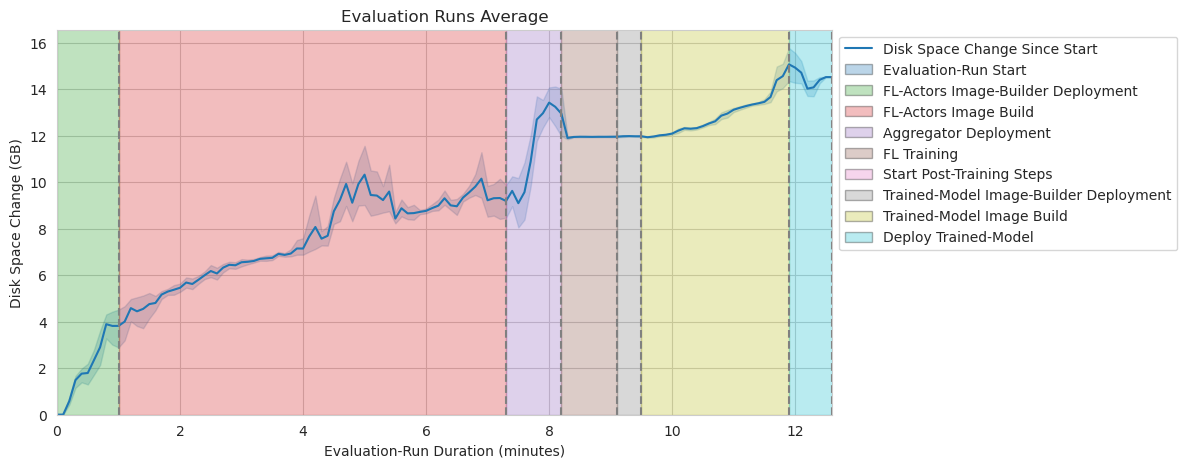

In [4]:
draw_disk_space_linegraph(normalized_df)

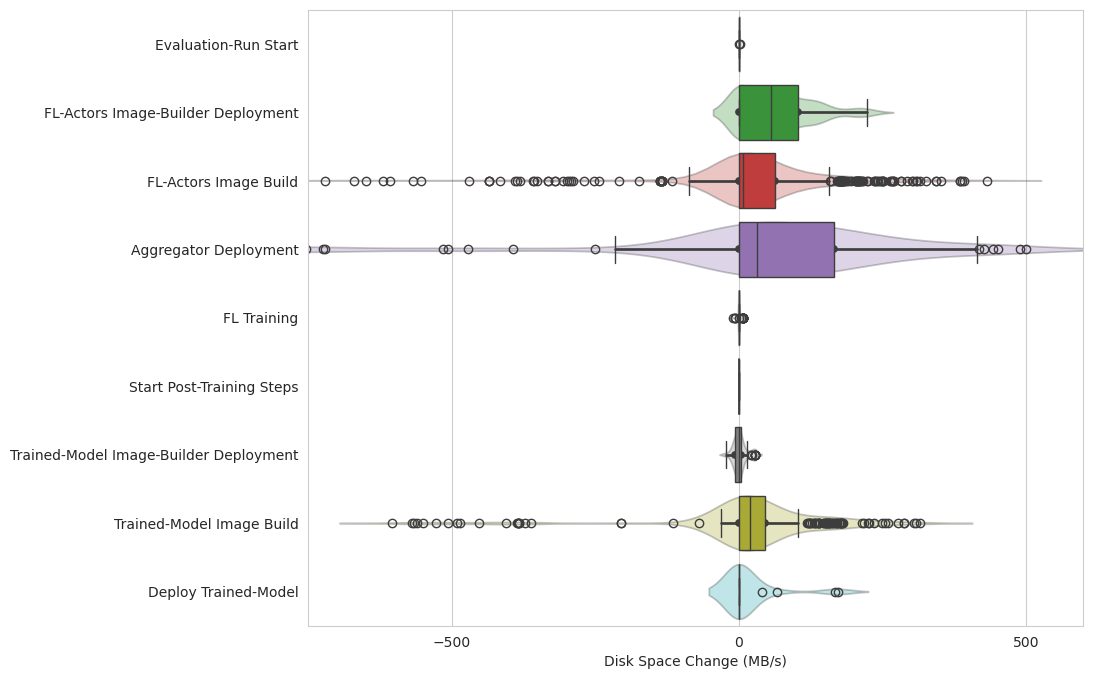

In [5]:
draw_box_violin_plot_for_each_stage_for_disk_space(df)

/home/alex/oakestra-cli/oak_cli/evaluation/addons/flops/utils/special_graphs/mb_per_second.py:28: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(
/home/alex/oakestra-cli/oak_cli/evaluation/addons/flops/utils/special_graphs/mb_per_second.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


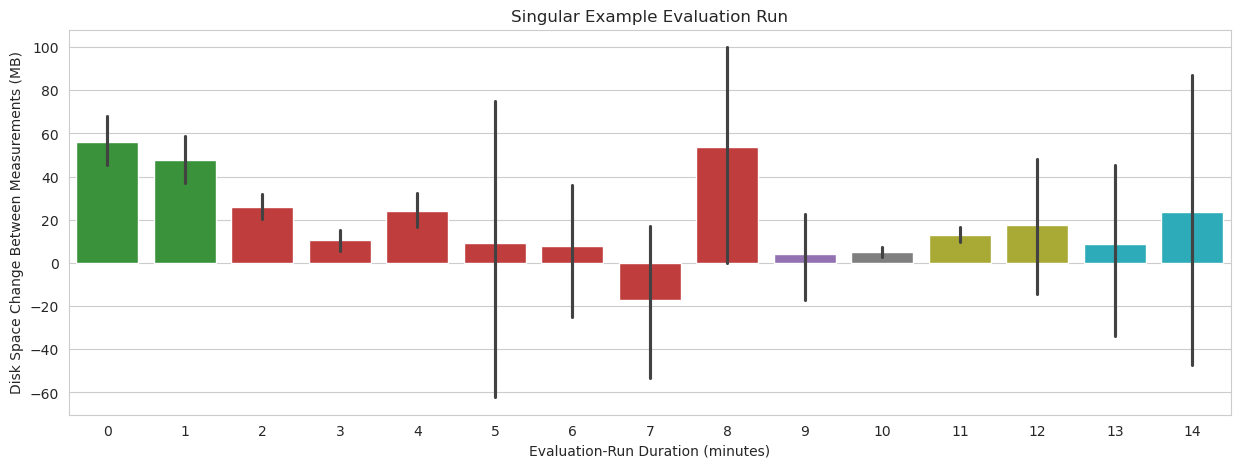

In [10]:
draw_mb_per_second_graph(data=df, use_bar_plot=True)

In [ ]:
draw_mb_per_second_graph(data=df, use_bar_plot=True, show_confidence_interval=False)

/home/alex/oakestra-cli/oak_cli/evaluation/addons/flops/utils/special_graphs/mb_per_second.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


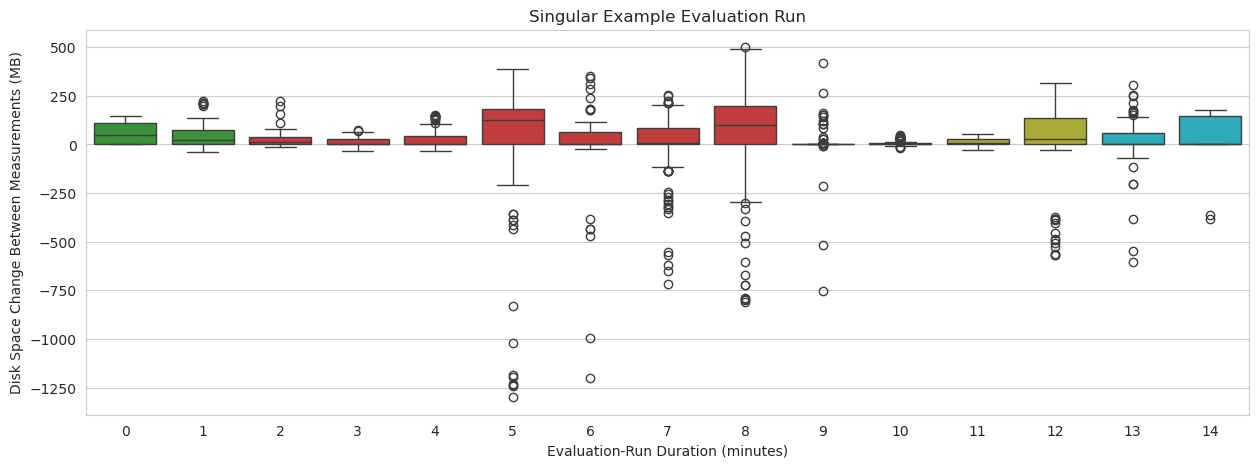

In [7]:
draw_mb_per_second_graph(data=df)

/tmp/ipykernel_204246/3856465218.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  lambda: sns.boxplot(


TypeError: Axes.bxp() got an unexpected keyword argument 'ci'

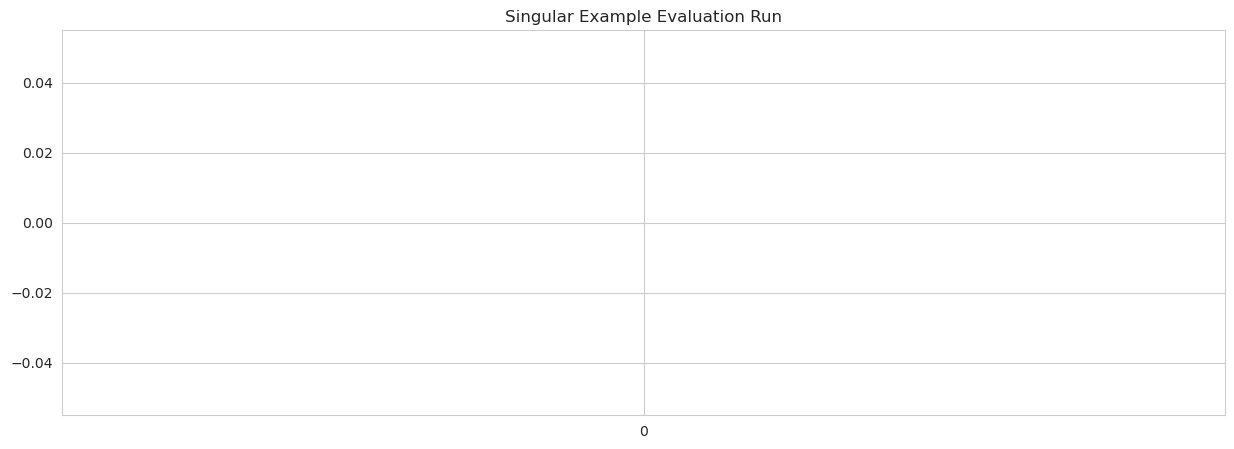

In [8]:
max_y = singular_run_df[DISK_LAST_KEY].max()
_test = singular_run_df.copy()
_test[["Disk MB/s"]] = round(_test[[DISK_LAST_KEY]] / 5, 0)
_test.reset_index(inplace=True)
_test[TIME_START_KEY] = round(_test[TIME_START_KEY]).astype(int)
_test.set_index(TIME_START_KEY, inplace=True)



from oak_cli.evaluation.addons.flops.utils.stages.auxiliary import (
    get_stage_color_mapping,
)

stage_color_map = get_stage_color_mapping(use_stage_names_as_keys=True)

test_dict = {}
for i, row in _test.iterrows():
    color = stage_color_map[row[STAGE_KEY]]
    test_dict[str(i)] = color


draw_graph(
    size=(15,5),
    title="Singular Example Evaluation Run",
    data=_test[[CPU_KEY, STAGE_KEY]],
    plot_functions=[
        lambda: sns.boxplot(
        #lambda: sns.barplot(
            data=_test,
            x=TIME_START_KEY,
            y="Disk MB/s",
            palette=test_dict,
            ci=None,
            #ci=,
        )
    ],
    y_label="Disk Space Change Between Measurements (MB)",
)